<a href="https://colab.research.google.com/github/theaok/vis/blob/main/plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## plotly

In [5]:
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted

it goes as a separate sec because it is interactive, really kind of different beast

still the visuals and interpretations overlap with earlier mpl

and plotly notebooks can take a ton of space, lots of mb

REFS: 

https://plotly.com/python/basic-charts/

https://nbviewer.org/gist/msund/7ac1203ded66fe8134cc



### scatterplots

In [3]:
auto=pd.read_stata('https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download')
#auto.describe().T.round(2)

###bar chart, just use mpl--not super useful to have it interactive 
#plotly couldnt handle missing data for bar chart so dropped them
#auto['rep78'].isnull()
#len(auto.dropna())
#a=auto.dropna()
#fig = px.histogram(a, x="rep78", y="mpg",
#             color='foreign', barmode='group',
#             height=400, width=600)
#fig.show()

In [9]:
fig = px.scatter(auto, x="weight", y="mpg",symbol='foreign', color="price",
                 size='headroom', hover_data=['make'],width=1000,height=600)
fig.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'scatter plot showing 5vars and make on hover') #,title_font_size=15,title_y=.92
#fig.write_html("sc.html",include_plotlyjs='cdn')
#note: hover to pop up info, box select to zoom, and can turn off domestic or foreign
#note2: just demonstration, of course this is too much! be parsimonious/simple/clean

btw since you have interactive vis in html/java script, put it on your website; you can get free website off github, instructions: https://www.khanacademy.org/computing/computer-programming/html-css/web-development-tools/a/hosting-your-website-on-github or https://www.geeksforgeeks.org/using-github-to-host-a-free-static-website/

and then upload the html there, i did for my github: 
https://theaok.github.io/junk/sc.html

and then you can embed it in another website with:

`<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://theaok.github.io/junk/sc.html" height="600" width="900"></iframe>`

as i did: https://theaok.github.io/junk/scEm.html , and lets see page source

In [17]:
df = px.data.iris()
fig = px.scatter_matrix(auto,
    dimensions=["weight", "length", "price", "mpg"],
    color="foreign", #symbol="trunk",
    title="can brush select",
    hover_data=['make'])
fig.update_traces(diagonal_visible=False)

### dens heat, sunburst, treemap, radar

In [20]:
auto.headroom.value_counts()
pd.crosstab(auto["headroom"],auto["rep78"])

3.5    15
2.5    14
3.0    13
2.0    13
4.0    10
4.5     4
1.5     4
5.0     1
Name: headroom, dtype: int64

rep78,1.0,2.0,3.0,4.0,5.0
headroom,,,,,
1.5,1,0,0,2,0
2.0,1,3,5,1,3
2.5,0,0,5,5,4
3.0,0,0,4,3,4
3.5,0,1,10,2,0
4.0,0,2,3,5,0
4.5,0,1,3,0,0
5.0,0,1,0,0,0


In [ ]:
px.density_heatmap(auto, x="rep78", y="headroom", marginal_x="histogram", marginal_y="histogram") #nice!! love it! will use it a lot!
#color ramp makes sense too: dark: few, the brighter, the more

In [21]:
px.density_heatmap(auto, x="foreign", y="headroom", marginal_x="histogram", marginal_y="histogram") #nice!!

In [23]:
# sunburst kind of cool too
fig = px.sunburst(auto, path=[px.Constant("cars, cars, cars"), 'headroom', 'foreign'], color = 'price',
                    color_continuous_scale='Rainbow',
                    color_continuous_midpoint=auto.price.mean()
                 )
fig.update_layout(
    title_text = 'Distribution of foreign/domestic cars per headroom'
)

In [26]:
df = px.data.gapminder().query("year == 2007")
fig = px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

In [ ]:
# radar or spider web https://plotly.com/python/radar-chart/
categories = ['processing cost','mechanical properties','chemical stability',
              'thermal stability', 'device integration']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[1, 5, 2, 2, 3],
      theta=categories,
      fill='toself',
      name='Product A'
))
fig.add_trace(go.Scatterpolar(
      r=[4, 3, 2.5, 1, 2],
      theta=categories,
      fill='toself',
      name='Product B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

and yes, you guessed it right, of course mpl can do radar; it's just the code is like sending a rocket to the outer space, for mpl afficionados only:
https://www.python-graph-gallery.com/web-radar-chart-with-matplotlib

### [*] sankey

kind of cool, but can be pain to set up, and need flow data from source to target, or at least some kind of clear linkage between categories

https://www.python-graph-gallery.com/sankey-diagram/

https://plotly.com/python/sankey-diagram/

https://chart-studio.plotly.com/~alishobeiri/1591/plotly-sankey-diagrams/#/

https://chart-studio.plotly.com/feed/?q=plottype:sankey#/

In [ ]:
#simple example, each source has only one target (target can have multiple sources)
#a={
#    'a':(1,2),
#    'b':(3,4),
#    'c':(5,6)
#}
#pd.DataFrame(a)
label = ["A", "B", "C", "D", "E", "F", "G"]
source = [0, 6, 1, 4, 2, 3,np.nan]
target = [2, 1, 5, 2, 1, 5,np.nan]
value = [7, 1, 3, 6, 9, 4,np.nan]
txt=['0A-7->2C','6G-1->1B','1B-3->5F','','','','']
df = pd.DataFrame(list(zip(label,source,target,value,txt)),columns =['label','source','target','value','txt'])
df

,label,source,target,value,txt
0,A,0.0,2.0,7.0,0A-7->2C
1,B,6.0,1.0,1.0,6G-1->1B
2,C,1.0,5.0,3.0,1B-3->5F
3,D,4.0,2.0,6.0,
4,E,2.0,1.0,9.0,
5,F,3.0,5.0,4.0,
6,G,NaN,NaN,NaN,


In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      thickness = 5,
      line = dict(color = "green", width = 0.1),
      label = df.label,
      color = "blue"
    ),
    link = dict(
          
      # indices correspond to labels!!!
      source = df.source, 
      target = df.target,
      value  = df.value
  ))])
  
fig.show()

In [ ]:
#sankey real world example https://lifewithdata.com/2022/08/29/how-to-create-a-sankey-diagram-in-plotly-python
#want to link cc with gender with marital status
df = pd.read_csv('https://raw.githubusercontent.com/theaok/vis/main/clothing_store_sales.csv')
df

,Customer,Type of Customer,Items,Net Sales,Method of Payment,Gender,Marital Status,Age
0,1,Regular,1,39.50,Discover,Male,Married,32
1,2,Promotional,1,102.40,Proprietary Card,Female,Married,36
2,3,Regular,1,22.50,Proprietary Card,Female,Married,32
3,4,Promotional,5,100.40,Proprietary Card,Female,Married,28
4,5,Regular,2,54.00,MasterCard,Female,Married,34
...,...,...,...,...,...,...,...,...
95,96,Regular,1,39.50,MasterCard,Female,Married,44
96,97,Promotional,9,253.00,Proprietary Card,Female,Married,30
97,98,Promotional,10,287.59,Proprietary Card,Female,Married,52
98,99,Promotional,2,47.60,Proprietary Card,Female,Married,30


In [ ]:
# we gonna have 2 steps, so need to count twice: cc->gender; gender->marital status
df1 = df.groupby(['Method of Payment','Gender'])['Customer'].count().reset_index() #agg cutomers to counts
df1.columns = ['source','target','value'] #must have these col names
df1

,source,target,value
0,American Express,Female,2
1,Discover,Female,3
2,Discover,Male,1
3,MasterCard,Female,13
4,MasterCard,Male,1
5,Proprietary Card,Female,67
6,Proprietary Card,Male,3
7,Visa,Female,8
8,Visa,Male,2


In [ ]:
df2 = df.groupby(['Gender','Marital Status'])['Customer'].count().reset_index()
df2.columns = ['source','target','value']
df2

,source,target,value
0,Female,Married,80
1,Female,Single,13
2,Male,Married,4
3,Male,Single,3


In [ ]:
#combine all the linkages into 1 file (put them on the top of each other)
links = pd.concat([df1, df2], axis=0)
links['s']=links['source']
links['t']=links['target']
links.reset_index(drop=True, inplace=True)

In [ ]:
#get unique vals for source and target
uni=pd.unique(links[['source', 'target']].values.ravel('K'))
uni

array(['American Express', 'Discover', 'MasterCard', 'Proprietary Card',
       'Visa', 'Female', 'Male', 'Married', 'Single'], dtype=object)

In [ ]:
#enumerate them in dict format
mapDic = {k: v for v, k in enumerate(uni)}
mapDic

{'American Express': 0,
 'Discover': 1,
 'MasterCard': 2,
 'Proprietary Card': 3,
 'Visa': 4,
 'Female': 5,
 'Male': 6,
 'Married': 7,
 'Single': 8}

In [ ]:
#hit the links (source and target) with dict #note alternative would be to merge
links['source'] = links['source'].map(mapDic)
links['target'] = links['target'].map(mapDic)
links

,source,target,value,s,t
0,0,5,2,American Express,Female
1,1,5,3,Discover,Female
2,1,6,1,Discover,Male
3,2,5,13,MasterCard,Female
4,2,6,1,MasterCard,Male
5,3,5,67,Proprietary Card,Female
6,3,6,3,Proprietary Card,Male
7,4,5,8,Visa,Female
8,4,6,2,Visa,Male
9,5,7,80,Female,Married


In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label = uni,
        color='green'
    ),
    link = dict(
        source= links['source'],
        target = links['target'],
        value = links['value']
    )
    
)
])
fig.update_layout(title='Clothing Store Sales')
fig.show()

LATER/TODO could use it on IRS county to county flows say for NJ counties

# d3js [on ice for now]

its with plotly because its interactive too: mpld3 turns mpl vis interactive

d3js.org

https://mpld3.github.io/

http://jakevdp.github.io/blog/2013/12/19/a-d3-viewer-for-matplotlib/

https://colab.research.google.com/github/sachinmotwani20/Raw-Signal-Processing-Python/blob/master/ZoomGraphGoogleColab.ipynb#scrollTo=FsdH0px_ofdc

again, i do think that mpl graphs are the best (quality, colors, inteface, setup, etc) [yes better than r], and if there's anything close to mpl it's d3 [tho quite old] 
<br><br>

**but keep it on ice for the time being**, can just use plotly or vega that are also interactive and looks like run on top of d3 anyway

https://github.com/mpld3/
mpld3 looked like great library, and indeed just turning plain mpl into d3js seems to work mostly fine; but then why use d3js? its awesome bc of interactive features, and for that need plugins and there's only handful of them, and need to incrporate them needing some additional code like list comprehension, and they are like >5yr old, and while eg tooltip seems to work just fine, LinkedBrush does not! even examples from mpl3d git have a bug: brush selection does not select points in other scatters! seems like have to have selection box that would cover the point in the other panel! BUG 

and looks like other wrappers for d3js have tiny funcionality

so like the best way would be to grab d3js graph and edit woth python to pass new data, but thats headache
<br><br>

and looks like d3js is now observablehq and economists uses them too; https://observablehq.com/@d3/gallery
https://observablehq.com/collection/@observablehq/featured-creators

<br>

https://d3-graph-gallery.com/

https://observablehq.com/@mbostock/d3-choropleth

https://gist.github.com/mbostock/6bbb0a7ff7686b124d80


In [ ]:
!pip install mpld3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 KB 5.3 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpld3 
from mpld3 import plugins

In [ ]:
#zoom, move around, go back home
fig, ax = plt.subplots()
np.random.seed(0)
ax.scatter(auto.weight,auto.mpg)

mpld3.display(fig) #if comment this out just regular mpl

#html = mpld3.fig_to_html(fig)
#print('\n'.join(html.split('\n'))) #this is html generated, could put on your website

In [ ]:
# id points http://mpld3.github.io/examples/scatter_tooltip.html
auto=auto.sort_index() 
fig, ax = plt.subplots()
np.random.seed(0)
points=ax.scatter(auto.weight,auto.mpg,color='white',edgecolors='red')#collect points

#labels = ["Point {0}".format(i) for i in range(40)]
labels=[auto['make'][i] for i in range(len(auto))] #need to define txt for popups
tooltip = plugins.PointLabelTooltip(points, labels)#combine points with labels

plugins.connect(fig, tooltip)#load plugin
mpld3.display(fig) 

# can popup custom table with info http://mpld3.github.io/examples/html_tooltips.html

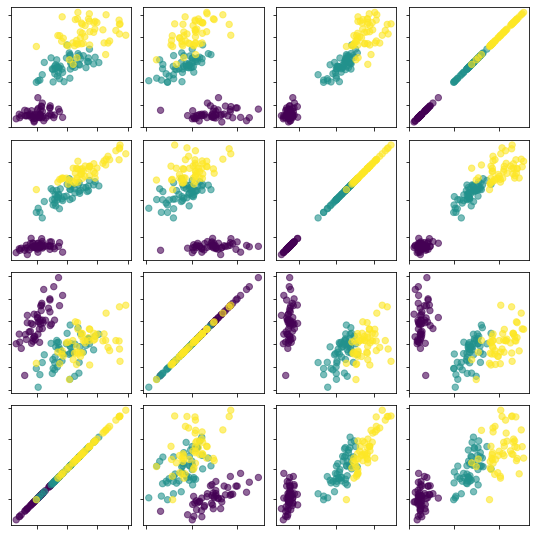

In [ ]:
#ex from mpld3 and already BUG as descr above
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

import mpld3
from mpld3 import plugins, utils


data = load_iris()
X = data.data
y = data.target

# dither the data for clearer plotting
X += 0.1 * np.random.random(X.shape)

fig, ax = plt.subplots(4, 4, sharex="col", sharey="row", figsize=(8, 8))
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
                    hspace=0.1, wspace=0.1)

for i in range(4):
    for j in range(4):
        points = ax[3 - i, j].scatter(X[:, j], X[:, i],
                                      c=y, s=40, alpha=0.6)

# remove tick labels
for axi in ax.flat:
    for axis in [axi.xaxis, axi.yaxis]:
        axis.set_major_formatter(plt.NullFormatter())

# Here we connect the linked brush plugin
plugins.connect(fig, plugins.LinkedBrush(points))

mpld3.enable_notebook()

#fig, ax = plt.subplots(3, 3, figsize=(6, 6))
#fig.subplots_adjust(hspace=0.1, wspace=0.1)
#ax = ax[::-1]
#
#X = np.random.normal(size=(3, 100))
#for i in range(3):
#    for j in range(3):
#       ax[i, j].xaxis.set_major_formatter(plt.NullFormatter())
#        ax[i, j].yaxis.set_major_formatter(plt.NullFormatter())
#        points = ax[i, j].scatter(X[j], X[i])
#        
#plugins.connect(fig, plugins.LinkedBrush(points))

In [ ]:
#brushable scatterplot; note may need to first select more than few pts for this to work BUG
auto=auto.sort_index() 
fig, axs = plt.subplots(1,2,figsize=(15,10))

for i,v in enumerate(['weight','length']):
  axs[i].xaxis.set_major_formatter(plt.NullFormatter())
  axs[i].yaxis.set_major_formatter(plt.NullFormatter())
  points=axs[i].scatter(auto[v],auto.mpg)
#points=axs[1].scatter(auto.length,auto.mpg)

plugins.connect(fig, plugins.LinkedBrush(points))
mpld3.display(fig)


In [ ]:
fig, axs = plt.subplots(1,2,figsize=(16,8)) #make it wide so can read labels better
auto=auto.sort_index() 

points=axs[0].scatter(auto['weight'],auto['mpg'],s=20)
axs[1].scatter(auto['length'],auto['mpg'],s=20)

#for i, txt in enumerate(auto['make']):
#   axs[0].annotate(txt, (auto['weight'][i],auto['mpg'][i]),fontsize=6)
#for i, txt in enumerate(auto['make']):
#   axs[1].annotate(txt, (auto['length'][i],auto['mpg'][i]),fontsize=6)

plugins.connect(fig, plugins.LinkedBrush(points))
mpld3.display(fig)

# other libs

## vega [MAYBE NOT]

probably easier than d3js to work from within Py, but again just use plotly; only if im really bored

https://vega.github.io/vega/examples/

## bokeh [NO]
adds nothing beyond mpl

# ggplot

this one's different, not js like the others here, and not interactive; but keeping here as it is quite sth else, not really python but rather py implementation 

REFS:

https://realpython.com/ggplot-python/

In [27]:
from plotnine import ggplot, aes, facet_grid, labs, stat_smooth, geom_smooth, facet_wrap, geom_point, geom_line, geom_point, geom_bar, geom_boxplot, theme_xkcd

In [28]:
auto=pd.read_stata('https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download')

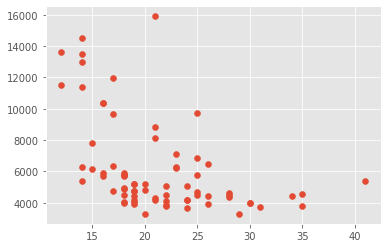

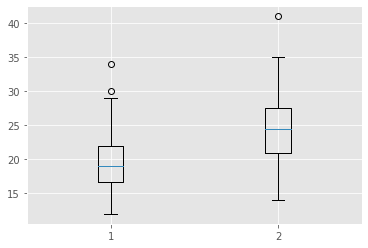

In [29]:
#first of all can get pretty much the same thing in mpl with ggplot style
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.scatter(auto.mpg,auto.price);plt.show()
g=auto[['mpg','foreign']].groupby('foreign')
plt.boxplot([g.get_group('Domestic')['mpg'],g.get_group('Foreign')['mpg']]);

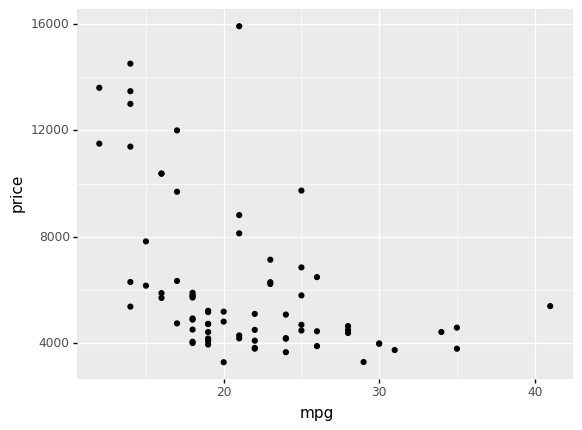

<ggplot: (8789336345052)>

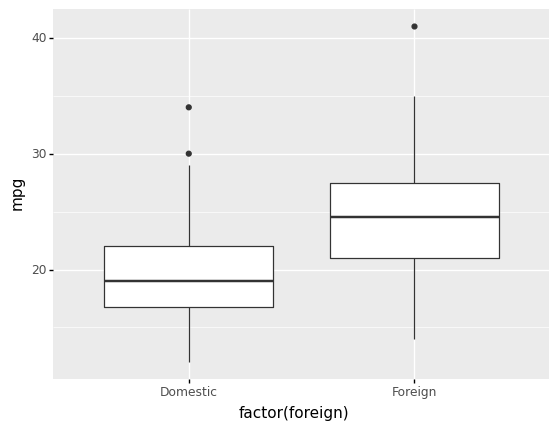

<ggplot: (8789333592820)>

In [ ]:
#right, so can have usual graphs
(
    ggplot(auto)  # What data to use
    + aes(x="mpg", y="price")  # What variable to use
    + geom_point()  # Geometric object to use for drawing
)

(
    ggplot(auto)  # What data to use
    + aes(x="factor(foreign)",y='mpg')  # What variable to use
    + geom_boxplot()  # Geometric object to use for drawing
)

In [ ]:
#but whats really useful can make this trellis/matrix/grid thingey
#of course afficionados will just use mpl with a loop, but this may be easier

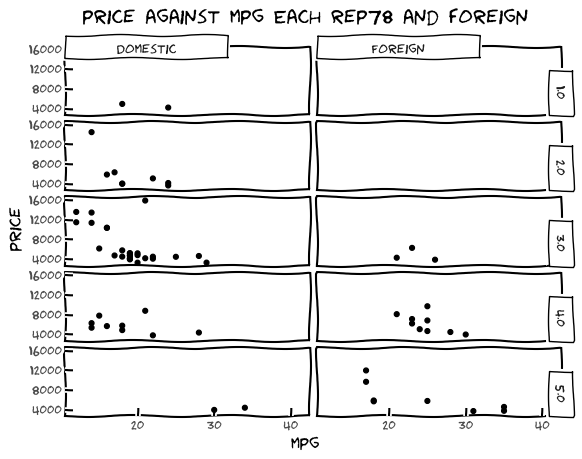

<ggplot: (8789333522764)>

In [ ]:
df=auto.dropna() #looks like it chokes on NaN
(
    ggplot(df)
    + facet_grid(facets="rep78~foreign") #grid
    + aes(x="mpg", y="price")
    + labs(
        x="mpg",
        y="price",
        title="price against mpg Each rep78 and foreign",
    )
    + geom_point()
    + theme_xkcd() #https://xkcd.com/ #https://plotnine.readthedocs.io/en/stable/api.html#themes
)

In [ ]:
#save plot
p=(
    ggplot(df)
    + facet_grid(facets="rep78~foreign") #grid
    + aes(x="mpg", y="price")
    + labs(
        x="mpg",
        y="price",
        title="price against mpg Each rep78 and foreign",
    )
    + geom_point()
    + theme_xkcd() #https://xkcd.com/ #https://plotnine.readthedocs.io/en/stable/api.html#themes
)
p.save("p.png", dpi=600)

/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: myplot.png


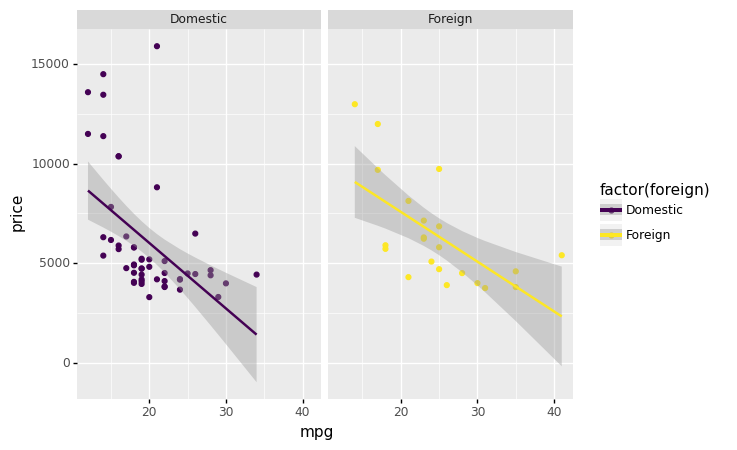

<ggplot: (8789336258844)>

In [ ]:
#split by just 1 var
(ggplot(auto, aes('mpg', 'price', color='factor(foreign)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~foreign'))

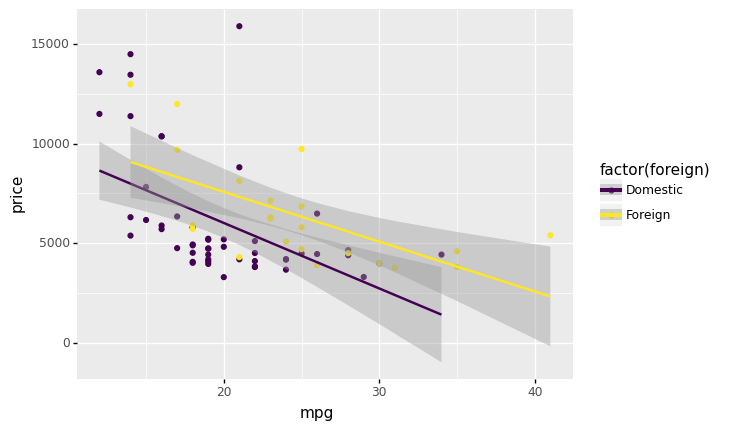

<ggplot: (8789331870880)>

In [ ]:
#in one graph
(
    ggplot(auto, aes(x='mpg', y='price', color='factor(foreign)'))
    + geom_point()
    + geom_smooth(method='lm')
    + labs(x='mpg', y='price')
)